Lane Detection

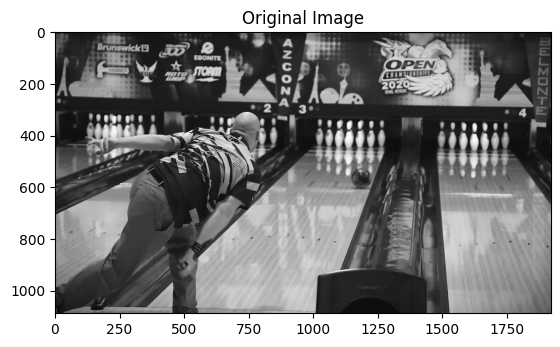

In [1]:
import cv2
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/Users/miche/OneDrive/Documenti/GitHub/bowling-analysis/data/recording_3/frames/frame_3 (80).png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

OTSU THRESHOLD FOR EDGE DETECTION \
good automatic way to find the threshold

In [2]:
# Compute Otsu's threshold 
otsu_thresh, _ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Set lower and upper thresholds relative to Otsu's threshold
lower = 0.5 * otsu_thresh
upper = 1.5 * otsu_thresh

edges = cv2.Canny(image, lower, upper)

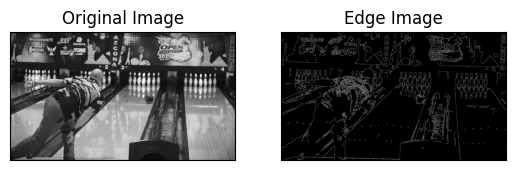

In [3]:
cv2.imshow("Canny Otsu", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Display the original image and the edge-detected image
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Line Detection

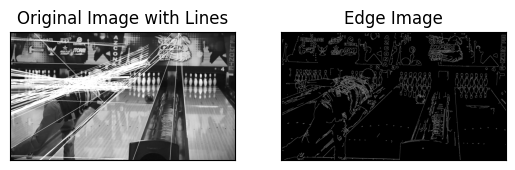

In [4]:
# Use Hough Line Transform to detect lines in the edge-detected image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
# Draw the lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the original image with detected lines
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image with Lines'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()